In [147]:
# Core imports and environment setup
import os
import sys
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Create folders
os.makedirs("models", exist_ok=True)
os.makedirs("outputs", exist_ok=True)

print("Environment ready. Working dir:", os.getcwd())

Environment ready. Working dir: C:\Users\chandanasree


In [149]:
# Core imports and environment setup
import os
import sys
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Create folders
os.makedirs("models", exist_ok=True)
os.makedirs("outputs", exist_ok=True)

print("Environment ready. Working dir:", os.getcwd())

Environment ready. Working dir: C:\Users\chandanasree


In [151]:
# Try automatic path first, else open file picker
default_path = r"C:\Users\chandanasree\OneDrive\Documents\data analyst projects\ML PROJECTS\CSV Prediction\data\online_retail_II.csv"

def load_dataset(path_hint=default_path):
    # Try default
    if os.path.exists(path_hint):
        print("Loading from default path:", path_hint)
        return pd.read_csv(path_hint, encoding='latin1')
    # Else use file picker (tkinter)
    try:
        import tkinter as tk
        from tkinter import filedialog
        root = tk.Tk()
        root.withdraw()
        print("Please choose the CSV file in the file dialog...")
        path = filedialog.askopenfilename(title="Select online_retail_II.csv", filetypes=[("CSV files","*.csv"),("All files","*.*")])
        if path:
            print("Loading:", path)
            return pd.read_csv(path, encoding='latin1')
        else:
            raise FileNotFoundError("No file selected.")
    except Exception as e:
        raise RuntimeError("Could not open file picker. Make sure you're running this locally. Error: " + str(e))

# Load
df = load_dataset()
print("Loaded dataset. Shape:", df.shape)
df.head()

Loading from default path: C:\Users\chandanasree\OneDrive\Documents\data analyst projects\ML PROJECTS\CSV Prediction\data\online_retail_II.csv
Loaded dataset. Shape: (1067371, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [153]:
# Quick dataset info
print("Columns:", list(df.columns))
print("\nSample rows:")
display(df.head())

print("\nBasic info:")
display(df.info())

# Show few stats
display(df.describe(include='all').transpose().head(30))

# Explanation (print friendly)
print("""
Column explanations (simple):
- InvoiceNo: Transaction identifier (C prefix often means cancellation).
- InvoiceDate: Date-time of the transaction.
- CustomerID: Unique customer ID (our key).
- Quantity: Number of items in that invoice line.
- Price: Price per item.
- StockCode: Product code.
- Description: Product description.
- Country: Customer country.
""")

Columns: ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']

Sample rows:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom



Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Invoice,1067371,53628,537434,1350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,1067371,5305,85123A,5829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,1062989,5698,WHITE HANGING HEART T-LIGHT HOLDER,5918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,1067371.0,NaN,NaN,NaN,9.938898,172.705794,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,1067371,47635,2010-12-06 16:57:00,1350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,1067371.0,NaN,NaN,NaN,4.649388,123.553059,-53594.36,1.25,2.1,4.15,38970.0
Customer ID,824364.0,NaN,NaN,NaN,15324.638504,1697.46445,12346.0,13975.0,15255.0,16797.0,18287.0
Country,1067371,43,United Kingdom,981330,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Column explanations (simple):
- InvoiceNo: Transaction identifier (C prefix often means cancellation).
- InvoiceDate: Date-time of the transaction.
- CustomerID: Unique customer ID (our key).
- Quantity: Number of items in that invoice line.
- Price: Price per item.
- StockCode: Product code.
- Description: Product description.
- Country: Customer country.



In [155]:
# Phase 4 functions: cleaning + feature engineering + transform
def clean_transactions(df):
    df = df.copy()
    # Standardize column names if common variants exist
    df.columns = [c.strip().replace(" ", "") for c in df.columns]
    # Some datasets use 'CustomerID' or 'Customer ID'
    if 'CustomerID' not in df.columns and 'CustomerID' in df.columns:
        pass
    # Drop rows without CustomerID
    if 'CustomerID' in df.columns:
        df = df.dropna(subset=['CustomerID'])
    # Remove cancelled invoices: InvoiceNo starting with 'C' or negative qty
    if 'InvoiceNo' in df.columns:
        df = df[~df['InvoiceNo'].astype(str).str.startswith('C', na=False)]
    # Ensure numeric
    for col in ['Quantity','Price']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    # Remove negative or zero quantity / price
    if 'Quantity' in df.columns:
        df = df[df['Quantity'] > 0]
    if 'Price' in df.columns:
        df = df[df['Price'] > 0]
    # Parse date
    if 'InvoiceDate' in df.columns:
        df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
    # Create TotalPrice
    if all(c in df.columns for c in ['Quantity','Price']):
        df['TotalPrice'] = df['Quantity'] * df['Price']
    return df

def build_customer_features(df, prediction_days=90, min_transactions=1):
    """
    Returns a customer-level DataFrame with features and a column 'FutureSpend' as target.
    Uses the last InvoiceDate as max_date and splits prediction_days back from there.
    """
    df = df.copy()
    if 'InvoiceDate' not in df.columns or 'CustomerID' not in df.columns:
        raise RuntimeError("Expected 'InvoiceDate' and 'CustomerID' in dataframe.")
    max_date = df['InvoiceDate'].max()
    cutoff = max_date - pd.Timedelta(days=prediction_days)
    obs = df[df['InvoiceDate'] <= cutoff].copy()
    pred = df[(df['InvoiceDate'] > cutoff) & (df['InvoiceDate'] <= max_date)].copy()
    # Aggregate target
    y = pred.groupby('CustomerID')['TotalPrice'].sum().rename('FutureSpend')
    # Build RFM + derived on observation
    agg = obs.groupby('CustomerID').agg(
        RecencyDays = ('InvoiceDate', lambda x: (cutoff - x.max()).days),
        Frequency = ('InvoiceNo', 'nunique'),
        Monetary = ('TotalPrice', 'sum'),
        FirstPurchase = ('InvoiceDate', 'min'),
        LastPurchase = ('InvoiceDate', 'max'),
        DistinctProducts = ('StockCode', pd.Series.nunique)
    ).reset_index().set_index('CustomerID')
    # Derived
    agg['AvgOrderValue'] = agg['Monetary'] / agg['Frequency']
    agg['TenureDays'] = (agg['LastPurchase'] - agg['FirstPurchase']).dt.days + 1
    agg['PurchaseRate'] = agg['Frequency'] / agg['TenureDays'].replace(0,1)
    # Country: most common per customer
    if 'Country' in obs.columns:
        country = obs.groupby('CustomerID')['Country'].agg(lambda x: x.mode().iloc[0] if len(x.mode())>0 else x.iloc[0])
        # collapse low-frequency countries into 'Other'
        top = country.value_counts().nlargest(8).index
        country = country.apply(lambda x: x if x in top else 'Other')
        agg['Country'] = country
    # join target
    data = agg.join(y, how='left').fillna({'FutureSpend': 0})
    # optional: filter by min_transactions
    data = data[data['Frequency'] >= min_transactions]
    return data

def transform_features_for_model(data, log_transform=True, scale=True):
    """
    Input: customer-level DataFrame with 'FutureSpend' and other numerical/categorical columns.
    Returns: X (DataFrame), y (Series), scaler (fitted or None), feature_columns (list)
    """
    df = data.copy()
    if 'FutureSpend' not in df.columns:
        raise RuntimeError("Target 'FutureSpend' not found in data.")
    y = df['FutureSpend'].astype(float)
    X = df.drop(columns=['FutureSpend'])
    # Log transform skewed monetary columns if requested
    if log_transform:
        for c in ['Monetary','AvgOrderValue','PurchaseRate']:
            if c in X.columns:
                X[c] = np.log1p(X[c].astype(float))
    # One-hot encode categorical columns (Country)
    cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()
    X = pd.get_dummies(X, columns=cat_cols, drop_first=False)
    # Fill NaNs
    X = X.fillna(0)
    # Scaling
    scaler = None
    if scale:
        scaler = StandardScaler()
        X_scaled = pd.DataFrame(scaler.fit_transform(X.values), columns=X.columns, index=X.index)
    else:
        X_scaled = X.copy()
    return X_scaled, y, scaler, list(X_scaled.columns)

In [157]:
# Clean transactions
df_clean = clean_transactions(df)
print("After cleaning shape:", df_clean.shape)
display(df_clean.head())

# Build customer features + target
customer_data = build_customer_features(df_clean, prediction_days=90, min_transactions=1)
print("Customer-level data shape:", customer_data.shape)
display(customer_data.head())

After cleaning shape: (805549, 9)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


KeyError: "Column(s) ['InvoiceNo'] do not exist"

In [163]:
# Robust rebuild of customer_data that auto-detects column names
import pandas as pd
import numpy as np
import os

# Use existing df in memory if present; otherwise try default path
if "df" not in globals():
    default_path = r"C:\Users\chandanasree\OneDrive\Documents\data analyst projects\ML PROJECTS\CSV Prediction\data\online_retail_II.csv"
    if os.path.exists(default_path):
        df = pd.read_csv(default_path, encoding='latin1')
    else:
        raise RuntimeError("Dataframe 'df' not found in memory and default file not found. Please load the CSV first.")

print("Columns in your dataframe:")
print(list(df.columns))

# helper to find a column by possible names (case-insensitive)
def find_col(df, candidates):
    cols_lower = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in cols_lower:
            return cols_lower[cand.lower()]
    return None

# detect likely columns
invoice_col = find_col(df, ["InvoiceNo","Invoice","InvoiceNumber","OrderNo","OrderID","TransactionID","Invoice_No"])
date_col    = find_col(df, ["InvoiceDate","Invoice Date","Date","TransactionDate","OrderDate"])
cust_col    = find_col(df, ["CustomerID","Customer Id","Customer","CustID"])
qty_col     = find_col(df, ["Quantity","Qty","quantity"])
price_col   = find_col(df, ["Price","UnitPrice","Unit Price","Amount","SalePrice","Unit_Price"])
stock_col   = find_col(df, ["StockCode","Stock Code","Stock","ProductID","SKU","ItemID","product_id","Product_Code"])
desc_col    = find_col(df, ["Description","ProductDescription","Product Description","ItemDescription"])

print("\nAuto-detected columns (None means not found):")
print("invoice_col:", invoice_col)
print("date_col   :", date_col)
print("cust_col   :", cust_col)
print("qty_col    :", qty_col)
print("price_col  :", price_col)
print("stock_col  :", stock_col)
print("desc_col   :", desc_col)

# Basic checks
if date_col is None:
    raise RuntimeError("Could not find any date column (InvoiceDate). Please check your CSV and ensure a date column exists.")

if cust_col is None:
    raise RuntimeError("Could not find CustomerID column. CLV requires a customer identifier.")

# Create cleaned df copy
dfc = df.copy()

# Normalize common columns: cast types and column names we'll use below
dfc[date_col] = pd.to_datetime(dfc[date_col], errors='coerce')

if qty_col is not None:
    dfc[qty_col] = pd.to_numeric(dfc[qty_col], errors='coerce')
if price_col is not None:
    dfc[price_col] = pd.to_numeric(dfc[price_col], errors='coerce')

# Remove rows missing customer or date
dfc = dfc.dropna(subset=[cust_col, date_col])

# Remove cancellations if invoice contains 'C' prefix (only if invoice_col exists)
if invoice_col is not None:
    mask_cancel = dfc[invoice_col].astype(str).str.startswith('C', na=False)
    if mask_cancel.any():
        dfc = dfc[~mask_cancel]

# Remove non-positive qty/price if available
if qty_col is not None:
    dfc = dfc[dfc[qty_col] > 0]
if price_col is not None:
    dfc = dfc[dfc[price_col] > 0]

# Create TotalPrice
if qty_col is not None and price_col is not None:
    dfc["TotalPrice"] = dfc[qty_col] * dfc[price_col]
else:
    # fallback: if there's an Amount/Value column present use it; else set TotalPrice=0 (will affect target)
    amount_col = find_col(dfc, ["TotalPrice","Amount","Value","SalesAmount","Total"])
    if amount_col is not None:
        dfc["TotalPrice"] = pd.to_numeric(dfc[amount_col], errors='coerce').fillna(0)
    else:
        dfc["TotalPrice"] = 0.0

# Now define a robust build function using the detected column names
def build_customer_data_robust(dfc, date_col, cust_col, invoice_col=None, stock_col=None, prediction_days=90, min_transactions=1):
    dfc = dfc.copy()
    max_date = dfc[date_col].max()
    cutoff = max_date - pd.Timedelta(days=prediction_days)
    obs = dfc[dfc[date_col] <= cutoff].copy()
    pred = dfc[(dfc[date_col] > cutoff) & (dfc[date_col] <= max_date)].copy()

    # target aggregation
    y = pred.groupby(cust_col)["TotalPrice"].sum().rename("FutureSpend")

    # Frequency: prefer invoice-based unique count; fallback to transaction rows count
    if invoice_col and invoice_col in obs.columns:
        freq = obs.groupby(cust_col)[invoice_col].nunique().rename("Frequency")
    else:
        freq = obs.groupby(cust_col).size().rename("Frequency")

    # Recency: days since last purchase up to cutoff
    recency = obs.groupby(cust_col)[date_col].max().apply(lambda x: (cutoff - x).days).rename("RecencyDays")

    # Monetary
    monetary = obs.groupby(cust_col)["TotalPrice"].sum().rename("Monetary")

    # First/Last purchase
    first = obs.groupby(cust_col)[date_col].min().rename("FirstPurchase")
    last = obs.groupby(cust_col)[date_col].max().rename("LastPurchase")

    # Distinct products if stock_col present
    if stock_col and stock_col in obs.columns:
        distinct = obs.groupby(cust_col)[stock_col].nunique().rename("DistinctProducts")
    else:
        distinct = obs.groupby(cust_col).agg(lambda x: x.size).rename("DistinctProducts")

    # Merge into DataFrame
    agg = pd.concat([recency, freq, monetary, first, last, distinct], axis=1)
    # Derived features
    agg["AvgOrderValue"] = agg["Monetary"] / agg["Frequency"].replace(0, np.nan)
    agg["TenureDays"] = (agg["LastPurchase"] - agg["FirstPurchase"]).dt.days + 1
    agg["PurchaseRate"] = agg["Frequency"] / agg["TenureDays"].replace(0,1)
    # Country if exists
    if "Country" in obs.columns:
        country = obs.groupby(cust_col)["Country"].agg(lambda x: x.mode().iloc[0] if len(x.mode())>0 else x.iloc[0])
        top = country.value_counts().nlargest(8).index
        country = country.apply(lambda x: x if x in top else 'Other')
        agg["Country"] = country
    # join target and fill
    data = agg.join(y, how="left").fillna({"FutureSpend": 0})
    data = data[data["Frequency"] >= min_transactions]
    # reset index to ensure CustomerID as index
    data.index.name = "CustomerID"
    return data

# Build customer_data using robust builder
customer_data = build_customer_data_robust(dfc, date_col, cust_col, invoice_col=invoice_col, stock_col=stock_col, prediction_days=90, min_transactions=1)

print("Built customer_data. Shape:", customer_data.shape)
display(customer_data.head())

Columns in your dataframe:
['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']

Auto-detected columns (None means not found):
invoice_col: Invoice
date_col   : InvoiceDate
cust_col   : Customer ID
qty_col    : Quantity
price_col  : Price
stock_col  : StockCode
desc_col   : Description
Built customer_data. Shape: (5281, 11)


,RecencyDays,Frequency,Monetary,FirstPurchase,LastPurchase,DistinctProducts,AvgOrderValue,TenureDays,PurchaseRate,Country,FutureSpend
CustomerID,,,,,,,,,,,
12346.0,235,12,77556.46,2009-12-14 08:34:00,2011-01-18 10:01:00,27,6463.038333,401,0.029925,United Kingdom,0.00
12347.0,39,6,4114.18,2010-10-31 14:20:00,2011-08-02 08:48:00,107,685.696667,275,0.021818,Other,1519.14
12348.0,158,4,1709.40,2010-09-27 14:59:00,2011-04-05 10:47:00,25,427.350000,190,0.021053,Other,310.00
12349.0,317,3,2671.14,2010-04-29 13:20:00,2010-10-28 08:23:00,90,890.380000,182,0.016484,Other,1757.55
12350.0,219,1,334.40,2011-02-02 16:01:00,2011-02-02 16:01:00,17,334.400000,1,1.000000,Other,0.00


,count,mean,min,25%,50%,75%,max,std
RecencyDays,5281.0,207.282901,0.0,49.0,164.0,326.0,648.0,175.007174
Frequency,5281.0,5.745692,1.0,1.0,3.0,6.0,309.0,11.464582
Monetary,5281.0,2705.436178,2.9,323.86,804.02,2118.75,484615.1,12535.825033
FirstPurchase,5281,2010-07-05 05:33:59.318310912,2009-12-01 07:45:00,2010-01-31 12:43:00,2010-05-24 10:43:00,2010-11-02 15:42:00,2011-09-09 14:14:00,NaN
LastPurchase,5281,2011-02-14 17:34:20.109827584,2009-12-01 09:55:00,2010-10-18 15:37:00,2011-03-30 11:04:00,2011-07-22 13:53:00,2011-09-09 15:53:00,NaN
DistinctProducts,5281.0,74.356751,1.0,18.0,41.0,92.0,2182.0,104.968606
AvgOrderValue,5281.0,377.243645,2.9,179.31,283.525,420.666957,14844.766667,540.778575
TenureDays,5281.0,225.148457,1.0,1.0,171.0,418.0,647.0,218.803611
PurchaseRate,5281.0,0.356059,0.00316,0.014925,0.030019,1.0,4.0,0.502073
FutureSpend,5281.0,577.749021,0.0,0.0,0.0,437.37,168469.6,4021.170162


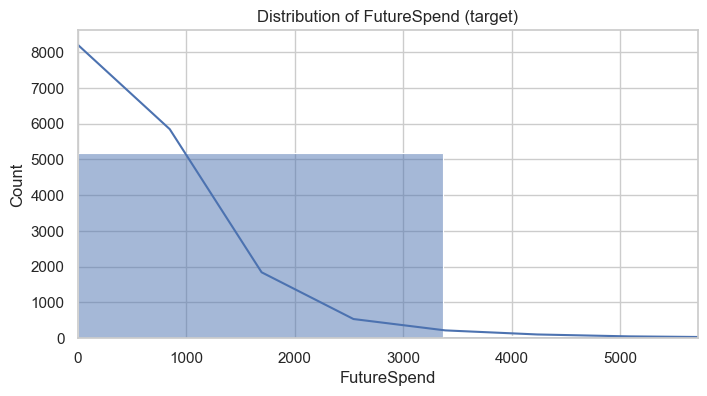

In [165]:
# Basic statistics
display(customer_data.describe().transpose())

# Distribution of FutureSpend (target)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(customer_data['FutureSpend'], bins=50, kde=True)
plt.title("Distribution of FutureSpend (target)")
plt.xlim(0, customer_data['FutureSpend'].quantile(0.99))
plt.show()

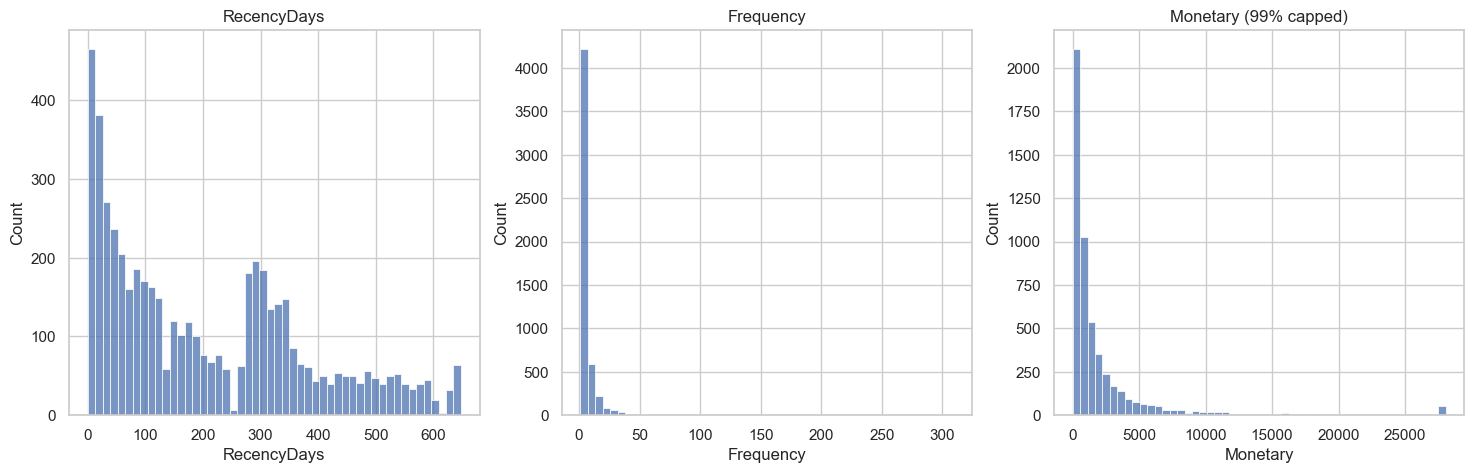

In [167]:
fig, axes = plt.subplots(1,3, figsize=(18,5))

sns.histplot(customer_data['RecencyDays'], bins=50, ax=axes[0])
axes[0].set_title("RecencyDays")

sns.histplot(customer_data['Frequency'], bins=50, ax=axes[1])
axes[1].set_title("Frequency")

sns.histplot(customer_data['Monetary'].clip(upper=customer_data['Monetary'].quantile(0.99)), 
             bins=50, ax=axes[2])
axes[2].set_title("Monetary (99% capped)")

plt.show()

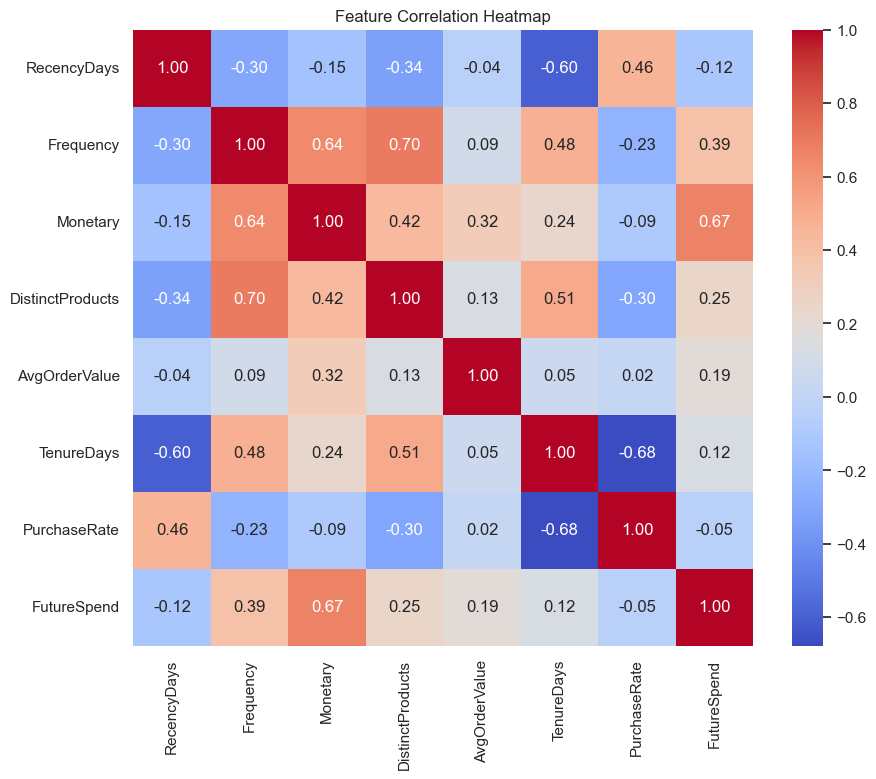

In [169]:
num_cols = customer_data.select_dtypes(include=['float','int']).columns.tolist()

plt.figure(figsize=(10,8))
sns.heatmap(customer_data[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [173]:
# Robust transform (fixed) -> fit scaler only on numeric columns (no timestamps)
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.model_selection import train_test_split

def transform_features_for_model_fixed(data, log_transform=True, scale=True):
    """
    - Drops datetime columns automatically (they are not directly scaled)
    - Applies log1p to monetary-like cols if requested
    - One-hot encodes categorical cols
    - Fits StandardScaler to numeric columns and returns scaled DataFrame
    """
    df = data.copy()
    if "FutureSpend" not in df.columns:
        raise RuntimeError("Target 'FutureSpend' not found in customer_data. Please rebuild customer_data first.")
    # target
    y = df["FutureSpend"].astype(float).copy()
    X = df.drop(columns=["FutureSpend"]).copy()
    
    # 1) Detect & drop datetime columns (so scaler won't choke)
    datetime_cols = [c for c in X.columns if np.issubdtype(X[c].dtype, np.datetime64)]
    if datetime_cols:
        print("Dropping datetime columns before scaling:", datetime_cols)
        X = X.drop(columns=datetime_cols)
    
    # Sometimes FirstPurchase/LastPurchase are object strings; try to coerce and drop if datetime-ish
    for c in X.columns:
        if X[c].dtype == object:
            # quick check: many values parse to datetimes?
            try:
                parsed = pd.to_datetime(X[c], errors='coerce')
                non_null_pct = parsed.notna().mean()
                if non_null_pct > 0.6:  # majority parse as dates -> drop column
                    print(f"Dropping column '{c}' (detected mostly datetime-like, parse rate {non_null_pct:.2f})")
                    X = X.drop(columns=[c])
            except Exception:
                pass

    # 2) Apply log1p transforms to skewed monetary columns if present
    if log_transform:
        for col in ["Monetary", "AvgOrderValue", "PurchaseRate"]:
            if col in X.columns:
                X[col] = np.log1p(X[col].astype(float).fillna(0.0))

    # 3) One-hot encode categorical columns (Country)
    cat_cols = X.select_dtypes(include=["object","category"]).columns.tolist()
    if cat_cols:
        print("One-hot encoding categorical columns:", cat_cols)
        X = pd.get_dummies(X, columns=cat_cols, drop_first=False)
    
    # 4) Fill NaNs and ensure numeric
    X = X.fillna(0.0)
    # Convert any remaining non-numeric columns (if any) to numeric where possible; otherwise drop
    for col in X.columns:
        if not np.issubdtype(X[col].dtype, np.number):
            try:
                X[col] = pd.to_numeric(X[col], errors='coerce').fillna(0.0)
            except Exception:
                print("Dropping non-numeric column:", col)
                X = X.drop(columns=[col])
    
    # 5) Scaling: fit scaler on numeric columns only
    scaler = None
    X_scaled = X.copy()
    if scale:
        scaler = StandardScaler()
        numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
        if len(numeric_cols) == 0:
            raise RuntimeError("No numeric columns available for scaling after preprocessing.")
        # fit_transform numeric columns
        X_scaled_numeric = scaler.fit_transform(X[numeric_cols].values)
        X_scaled = pd.DataFrame(X_scaled_numeric, columns=numeric_cols, index=X.index)
        # If there were any non-numeric columns remaining (unlikely), they'd be lost here; but we ensured numeric earlier
    feature_columns = list(X_scaled.columns)
    return X_scaled, y, scaler, feature_columns

# Run the fixed transform
X, y, scaler, feature_columns = transform_features_for_model_fixed(customer_data, log_transform=True, scale=True)

# Save scaler and feature columns for inference
if scaler is not None:
    joblib.dump(scaler, "models/scaler_clv.pkl")
joblib.dump(feature_columns, "models/feature_columns.pkl")

print("TRANSFORM COMPLETE.")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Saved scaler and feature_columns (models/).")
print("Sample feature columns:", feature_columns[:10])

# Train-test split (do this now)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("Train/Test split sizes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Dropping datetime columns before scaling: ['FirstPurchase', 'LastPurchase']
One-hot encoding categorical columns: ['Country']
TRANSFORM COMPLETE.
X shape: (5281, 7)
y shape: (5281,)
Saved scaler and feature_columns (models/).
Sample feature columns: ['RecencyDays', 'Frequency', 'Monetary', 'DistinctProducts', 'AvgOrderValue', 'TenureDays', 'PurchaseRate']
Train/Test split sizes: (4224, 7) (1057, 7) (4224,) (1057,)


Training Linear Regression (baseline)...
 → LinearRegression trained & saved: models/linreg_clv.pkl

Training Random Forest...
 → RandomForest trained & saved: models/rf_clv.pkl

Training XGBoost (this may take a minute)...
 → XGBoost trained & saved: models/xgb_clv.pkl

Model performance (sorted by RMSE):


,Model,MAE,RMSE,R2
0,RandomForest,590.607296,5648.552116,0.026256
1,LinearRegression,852.952957,5821.061405,-0.034130
2,XGBoost,643.951096,6022.271367,-0.106856



Saved best model (RandomForest) -> models/best_model.pkl


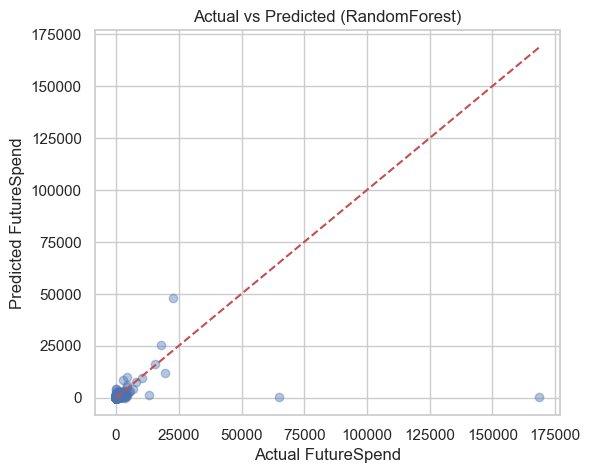


Models saved in 'models/' folder. If you plan to deploy, keep models/feature_columns.pkl and models/scaler_clv.pkl with the repo.


In [175]:
# ----------------------------
# MODEL TRAINING CELL: Linear Regression, RandomForest, XGBoost (if available)
# ----------------------------
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Safety checks
for name in ("X_train","X_test","y_train","y_test"):
    if name not in globals():
        raise RuntimeError(f"Required variable '{name}' not found. Please run the transform cell first.")

# helper for metrics
def eval_reg(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

results = []
models_dict = {}

print("Training Linear Regression (baseline)...")
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
results.append({"Model":"LinearRegression","MAE":eval_reg(y_test, pred_lr)[0],"RMSE":eval_reg(y_test, pred_lr)[1],"R2":eval_reg(y_test, pred_lr)[2]})
models_dict["LinearRegression"] = lr
joblib.dump(lr, "models/linreg_clv.pkl")
print(" → LinearRegression trained & saved: models/linreg_clv.pkl")

print("\nTraining Random Forest...")
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
results.append({"Model":"RandomForest","MAE":eval_reg(y_test, pred_rf)[0],"RMSE":eval_reg(y_test, pred_rf)[1],"R2":eval_reg(y_test, pred_rf)[2]})
models_dict["RandomForest"] = rf
joblib.dump(rf, "models/rf_clv.pkl")
print(" → RandomForest trained & saved: models/rf_clv.pkl")

# Try XGBoost if available
xgb = None
try:
    from xgboost import XGBRegressor
    print("\nTraining XGBoost (this may take a minute)...")
    xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, subsample=0.9, colsample_bytree=0.9, random_state=42, n_jobs=-1)
    xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
    pred_xgb = xgb.predict(X_test)
    results.append({"Model":"XGBoost","MAE":eval_reg(y_test, pred_xgb)[0],"RMSE":eval_reg(y_test, pred_xgb)[1],"R2":eval_reg(y_test, pred_xgb)[2]})
    models_dict["XGBoost"] = xgb
    joblib.dump(xgb, "models/xgb_clv.pkl")
    print(" → XGBoost trained & saved: models/xgb_clv.pkl")
except Exception as e:
    print("\nXGBoost not trained (not installed or failed). Error:", e)

# Results dataframe
res_df = pd.DataFrame(results).sort_values("RMSE").reset_index(drop=True)
print("\nModel performance (sorted by RMSE):")
display(res_df)

# Save best model
if not res_df.empty:
    best_name = res_df.loc[0, "Model"]
    best_model = models_dict.get(best_name)
    if best_model is None:
        # fallback: pick available object
        for n in ("xgb","rf","lr"):
            if n in globals():
                best_model = globals()[n]
                break
    if best_model is not None:
        joblib.dump(best_model, "models/best_model.pkl")
        print(f"\nSaved best model ({best_name}) -> models/best_model.pkl")
    else:
        print("\nCould not determine a best model object to save.")
else:
    print("No models were trained successfully.")

# Quick plot Actual vs Predicted for best model
try:
    y_pred_best = best_model.predict(X_test)
    plt.figure(figsize=(6,5))
    plt.scatter(y_test, y_pred_best, alpha=0.4)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual FutureSpend")
    plt.ylabel("Predicted FutureSpend")
    plt.title(f"Actual vs Predicted ({best_name})")
    plt.show()
except Exception as e:
    print("Could not plot Actual vs Predicted:", e)

print("\nModels saved in 'models/' folder. If you plan to deploy, keep models/feature_columns.pkl and models/scaler_clv.pkl with the repo.")

In [177]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# load best model
best_model = joblib.load("models/best_model.pkl")

# predictions
y_pred = best_model.predict(X_test)

# metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📌 Detailed Evaluation Metrics")
print("-----------------------------------")
print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R²   (Explained Variance): {r2:.4f}")

📌 Detailed Evaluation Metrics
-----------------------------------
MAE  (Mean Absolute Error): 590.61
RMSE (Root Mean Squared Error): 5648.55
R²   (Explained Variance): 0.0263


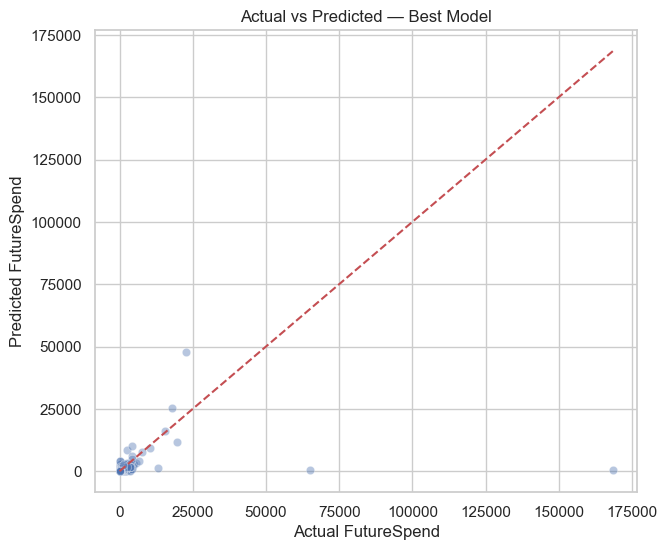

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')

plt.xlabel("Actual FutureSpend")
plt.ylabel("Predicted FutureSpend")
plt.title("Actual vs Predicted — Best Model")
plt.show()

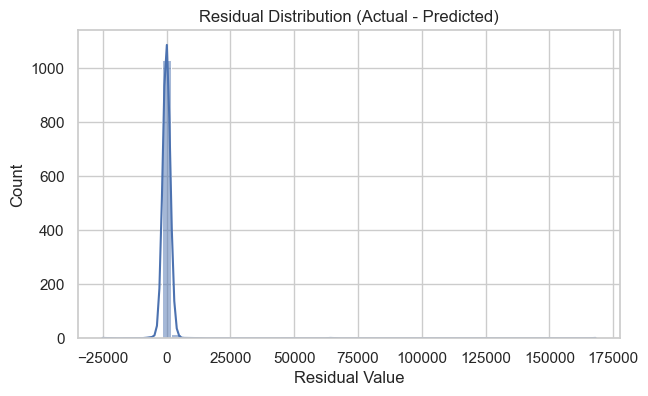

In [181]:
residuals = y_test - y_pred

plt.figure(figsize=(7,4))
sns.histplot(residuals, kde=True, bins=50)
plt.title("Residual Distribution (Actual - Predicted)")
plt.xlabel("Residual Value")
plt.show()

In [183]:
err_df = pd.DataFrame({
    "CustomerID": X_test.index,
    "Actual": y_test,
    "Predicted": y_pred,
})
err_df["Error"] = err_df["Actual"] - err_df["Predicted"]
err_df["AbsError"] = err_df["Error"].abs()

print("🔍 Biggest Errors (customers where model struggled most):")
display(err_df.sort_values("AbsError", ascending=False).head(10))

🔍 Biggest Errors (customers where model struggled most):


,CustomerID,Actual,Predicted,Error,AbsError
CustomerID,,,,,
16446.0,16446.0,168469.60,366.738587,168102.861413,168102.861413
14096.0,14096.0,64920.11,288.612996,64631.497004,64631.497004
12415.0,12415.0,22826.65,47959.417250,-25132.767250,25132.767250
14866.0,14866.0,13226.00,1419.822841,11806.177159,11806.177159
15838.0,15838.0,19489.58,11826.443672,7663.136328,7663.136328
15061.0,15061.0,17959.14,25370.978697,-7411.838697,7411.838697
16705.0,16705.0,4254.64,10116.717776,-5862.077776,5862.077776
14606.0,14606.0,2592.46,8315.290279,-5722.830279,5722.830279
13027.0,13027.0,0.00,4124.125728,-4124.125728,4124.125728


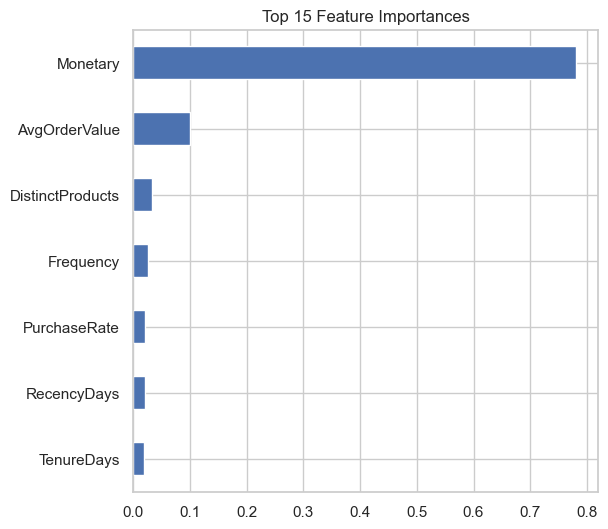

In [185]:
if hasattr(best_model, "feature_importances_"):
    fi = pd.Series(best_model.feature_importances_, index=X_train.columns)
    fi = fi.sort_values(ascending=False).head(15)

    plt.figure(figsize=(6,6))
    fi.plot(kind='barh')
    plt.title("Top 15 Feature Importances")
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("⚠️ Feature importance not available for this model (Linear Regression or unsupported).")

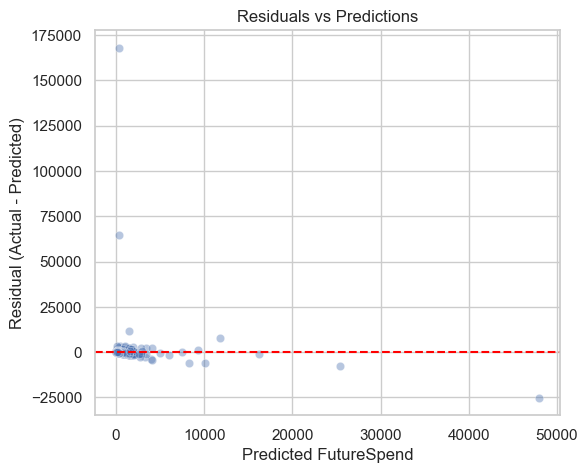

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.scatterplot(x=y_pred, y=(y_test - y_pred), alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted FutureSpend")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predictions")
plt.show()

In [191]:
seg_df = customer_data.copy()
seg_df["Prediction"] = best_model.predict(X)
seg_df["Error"] = seg_df["FutureSpend"] - seg_df["Prediction"]
seg_df["AbsError"] = abs(seg_df["Error"])

print("Error by Frequency Segment:")
display(seg_df.groupby(pd.qcut(seg_df["Frequency"], 4, duplicates="drop"))["AbsError"].mean())

print("\nError by Monetary Segment:")
display(seg_df.groupby(pd.qcut(seg_df["Monetary"], 4, duplicates="drop"))["AbsError"].mean())

print("\nError by Recency Segment:")
display(seg_df.groupby(pd.qcut(seg_df["RecencyDays"], 4, duplicates="drop"))["AbsError"].mean())

Error by Frequency Segment:


Frequency
(0.999, 3.0]    246.086077
(3.0, 6.0]      284.772294
(6.0, 309.0]    678.933731
Name: AbsError, dtype: float64


Error by Monetary Segment:


Monetary
(2.899, 323.86]        268.221057
(323.86, 804.02]       180.823158
(804.02, 2118.75]      255.822274
(2118.75, 484615.1]    717.479034
Name: AbsError, dtype: float64


Error by Recency Segment:


RecencyDays
(-0.001, 49.0]    657.244466
(49.0, 164.0]     440.204181
(164.0, 326.0]    209.249393
(326.0, 648.0]    112.988955
Name: AbsError, dtype: float64

In [193]:
err_df = pd.DataFrame({
    "CustomerID": X_test.index,
    "Actual": y_test,
    "Predicted": y_pred,
})
err_df["Error"] = err_df["Actual"] - err_df["Predicted"]
err_df["AbsError"] = abs(err_df["Error"])

display(err_df.sort_values("AbsError", ascending=False).head(10))

,CustomerID,Actual,Predicted,Error,AbsError
CustomerID,,,,,
16446.0,16446.0,168469.60,366.738587,168102.861413,168102.861413
14096.0,14096.0,64920.11,288.612996,64631.497004,64631.497004
12415.0,12415.0,22826.65,47959.417250,-25132.767250,25132.767250
14866.0,14866.0,13226.00,1419.822841,11806.177159,11806.177159
15838.0,15838.0,19489.58,11826.443672,7663.136328,7663.136328
15061.0,15061.0,17959.14,25370.978697,-7411.838697,7411.838697
16705.0,16705.0,4254.64,10116.717776,-5862.077776,5862.077776
14606.0,14606.0,2592.46,8315.290279,-5722.830279,5722.830279
13027.0,13027.0,0.00,4124.125728,-4124.125728,4124.125728


In [195]:
# Fixed segmentation + error-analysis cell (run this)
seg_df = customer_data.copy()
# If 'best_model' or 'X' not in memory, load best_model and/or recompute X
import joblib
if "best_model" not in globals():
    try:
        best_model = joblib.load("models/best_model.pkl")
        print("Loaded best_model from models/best_model.pkl")
    except Exception as e:
        print("best_model not in memory and could not load:", e)

# Ensure X exists for predictions; if not, try to reconstruct using feature_columns
if "X" not in globals():
    try:
        feat_cols = joblib.load("models/feature_columns.pkl")
        print("Loaded feature_columns (len={}): using columns for prediction.".format(len(feat_cols)))
        # try to build X from customer_data using only those columns (if present)
        X = customer_data[feat_cols].copy()
    except Exception as e:
        print("X not found and could not load feature_columns:", e)

# compute prediction (safe)
try:
    seg_df["Prediction"] = best_model.predict(X)
except Exception as e:
    print("Prediction failed:", e)
    # try best_model on X if feature mismatch, you may need to run alignment helper
    raise

seg_df["Error"] = seg_df["FutureSpend"] - seg_df["Prediction"]
seg_df["AbsError"] = seg_df["Error"].abs()

print("Error by Frequency Segment (qcut, duplicates dropped):")
display(seg_df.groupby(pd.qcut(seg_df["Frequency"], 4, duplicates="drop"))["AbsError"].mean())

print("\nError by Monetary Segment (qcut, duplicates dropped):")
display(seg_df.groupby(pd.qcut(seg_df["Monetary"], 4, duplicates="drop"))["AbsError"].mean())

print("\nError by Recency Segment (qcut, duplicates dropped):")
display(seg_df.groupby(pd.qcut(seg_df["RecencyDays"], 4, duplicates="drop"))["AbsError"].mean())

Error by Frequency Segment (qcut, duplicates dropped):


Frequency
(0.999, 3.0]    246.086077
(3.0, 6.0]      284.772294
(6.0, 309.0]    678.933731
Name: AbsError, dtype: float64


Error by Monetary Segment (qcut, duplicates dropped):


Monetary
(2.899, 323.86]        268.221057
(323.86, 804.02]       180.823158
(804.02, 2118.75]      255.822274
(2118.75, 484615.1]    717.479034
Name: AbsError, dtype: float64


Error by Recency Segment (qcut, duplicates dropped):


RecencyDays
(-0.001, 49.0]    657.244466
(49.0, 164.0]     440.204181
(164.0, 326.0]    209.249393
(326.0, 648.0]    112.988955
Name: AbsError, dtype: float64